In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lqfn.plain_qm import SchrodingerSystem

In [2]:
a = 1/2
N = 8
E_0 = 1/2

In [3]:
x_exact = np.linspace(-2.0, 2.0, 100)
x_pimc = np.linspace(-2.0, 2.0, 20)

# Harmonic oscillator

In [4]:
def V_harmonic_oscillator(x: float):
    return x**2 / 2

def psi_ground(x: float):
    return np.exp(-x**2 / 2) / np.pi**(1/4)

In [5]:
harmonic_oscillator = SchrodingerSystem(V=V_harmonic_oscillator, T=N*a, N=N)

In [6]:
propagators_exact = harmonic_oscillator.compute_propagator_from_ground_state(x_exact, ground_energy=E_0, ground_wavefunction=psi_ground)
propagators_pimc_results = harmonic_oscillator.compute_propagator_pimc(x_pimc)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

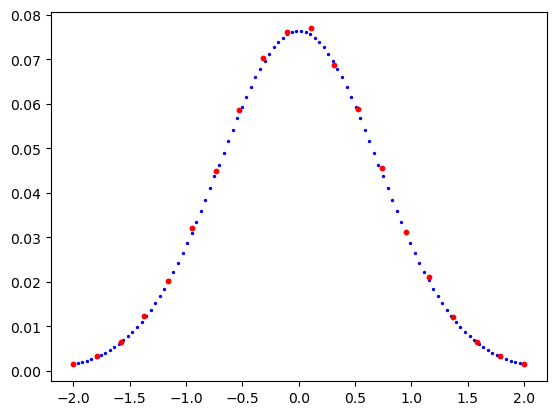

In [7]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red')
plt.show()

In [8]:
for result in propagators_pimc_results:
    print(result.Q)

0.834297696797328
0.7630805857625401
0.18625983701072615
0.943935097143525
0.9656618239757767
0.9436538268563764
0.2976322920990593
0.08390620211107266
0.42050962813710946
0.4026325532750249
0.31215279716221
0.23169645020371601
0.09577350540686444
0.05160755245159588
0.2804315450855443
0.28469384296385963
0.9352642701011843
0.09363249934396779
0.6304755882296302
0.060811747380216656


If all Qs are greater than $0.01$, it means that all points are statistically significant. 

# Potential $x^4/2$

In [9]:
def V_x4(x: float):
    return x ** 4 / 2

In [10]:
x4_system = SchrodingerSystem(V=V_x4, T=4, N=8)

In [11]:
propagators_exact = x4_system.compute_propagator_from_ground_state(x_exact)
propagators_pimc_results = x4_system.compute_propagator_pimc(x_pimc, lower_bound=-4, upper_bound=4, neval=10000)
propagators_pimc = np.array([ p.mean for p in propagators_pimc_results ])

Computing...
Took 0.008506536483764648


In [12]:
for result in propagators_pimc_results:
    print(result.Q)

0.4144327155383376
0.4026979294614781
0.46826650095054867
0.04750239399549848
0.6876227990089009
0.9143813462527614
0.7387842614403282
0.013810561965520798
0.22846491466564126
0.15340438228918515
0.45984467762860715
0.41948495938552854
0.06968521434696853
0.013217724365628864
0.3618248621257669
0.2670242484826202
0.029330378904787995
0.6898492377175058
0.6112947127098203
0.7658060766955426


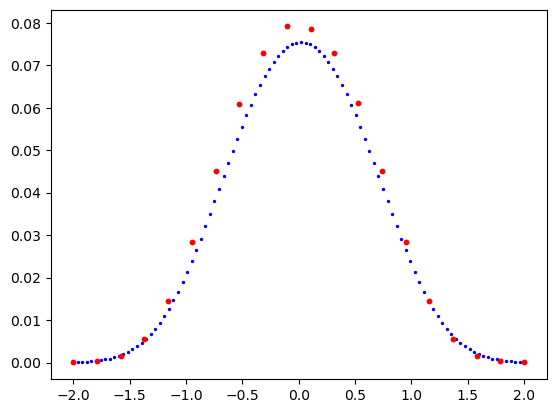

In [13]:
plt.scatter(x_exact, propagators_exact, s=2, color='blue')
plt.scatter(x_pimc, propagators_pimc, s=10, color='red')
plt.show()